In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('spam.tsv',sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
len(df)

5572

In [11]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
###### Balance Data ######

In [17]:
ham = df[df['label'] == 'ham']
ham.head()


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [18]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [19]:
ham = ham.sample(spam.shape[0])

In [20]:
ham.shape

(747, 4)

In [22]:
data = ham.append(spam,ignore_index = True)
data.head()
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


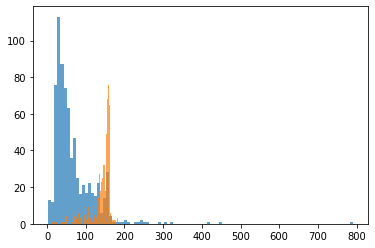

In [27]:
################ Explore Data #########################

plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

In [30]:
#################### Data Preparation  ###################

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
data.head()

,label,message,length,punct
0,ham,You can never do NOTHING,24,0
1,ham,Take something for pain. If it moves however t...,87,2
2,ham,Hi darlin im on helens fone im gonna b up the ...,88,0
3,ham,Whatsup there. Dont u want to sleep,35,1
4,ham,Yeah I'll try to scrounge something up,38,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, shuffle = True, random_state = 0, stratify=data['label'] )

In [37]:
###################### PipeLine and RF  ############################
##################
#Pipeline Repeatedly do command for all 
##################

clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs = -1))])

In [38]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [39]:
y_pred = clf.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       225
        spam       0.99      0.90      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [41]:
accuracy_score(y_test,y_pred)

0.9443207126948775

In [43]:
clf.predict(["Hey, How are you?"])

array(['ham'], dtype=object)

In [46]:
clf.predict(["Hey, You won lottary. Call 01912 to get it and bankdraft 1000$."])

array(['spam'], dtype=object)

In [55]:
################### SVM ########################
clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf',SVC(C=200,gamma = 'auto'))])
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=200, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [56]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9420935412026726